![banner cnns ppgcc ufsc](http://www.lapix.ufsc.br/wp-content/uploads/2019/04/VC2.png)


<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.00-IPython-Beyond-Normal-Python.ipynb"><img align="left"  src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>&nbsp; &nbsp;<a href=""><img align="left" src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/License-CC-BY-ND-4.0-orange.png" alt="Creative Commons 4.0 License" title="Creative Commons 4.0 License"></a>&nbsp; &nbsp; <a href=""><img align="left" src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/Jupyter-Notebook-v.1.0-blue.png" alt="Jupyter Version" title="Jupyter Version"></a>&nbsp; &nbsp;<a href=""><img align="left"  src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/Python-v.3.7-green.png" alt="Python Version" title="Python Version"></a>

# Classic Similarity Metrics

This notebook is dedicated to classic similarity (distance) metrics such as Euclidean distance, nearest neighbor and kNN, Hamming distance and city block (Manhattan) distance. We will discuss other metrics like the Statistic Similarity Metrics such as the (linear and opolynomial) Mahalanobis distance in other notebooks.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Nearest Neigbohr and kNN

## SciKit

- Library: SciKit-Learn
- Reference: https://scikit-learn.org/stable/modules/neighbors.html

This notebook employs a few Python extra functions from Matplotlib and from SciKit:
 * https://scikit-learn.org/stable/datasets/index.html

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

k = 5

# Smaller steps will produce finer decision areas
h = .05  # step size in the mesh

# Create 3-color color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Let's create a funtion to iterate through differente kNN models:
def do_kNN(X, y, k):
    fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)
    ax = axes.ravel()
    i = 0
    for weights in ['uniform', 'distance']:
        # First, we create an instance of Neighbours Classifier and fit the data
        # The kind of wieghting is passed in the variable 'weights':
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

        # Now, 'learn' the kNN: 
        clf.fit(X, y)

        # Plot the decision boundary. 
        # For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max]:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Predict the classes of all Iris data
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        # plt.figure()
        ax[i].pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        ax[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        # ax[i].xlim(xx.min(), xx.max())
        # ax[i].ylim(yy.min(), yy.max())
        ax[i].set_title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
        i = i + 1

    plt.show()

### Iris data

The Iris data is a classic...

 * [Reconhecimento de Padrões::Exemplo Detalhado: Discriminando Diferentes Variedades da Flor Iris](http://www.lapix.ufsc.br/ensino/reconhecimento-de-padroes/tecnicas-estatisticas/analise-de-discriminantes/#Segundo_Exemplo_Detalhado_Discriminando_Diferentes_Variedades_da_Flor_Iris)

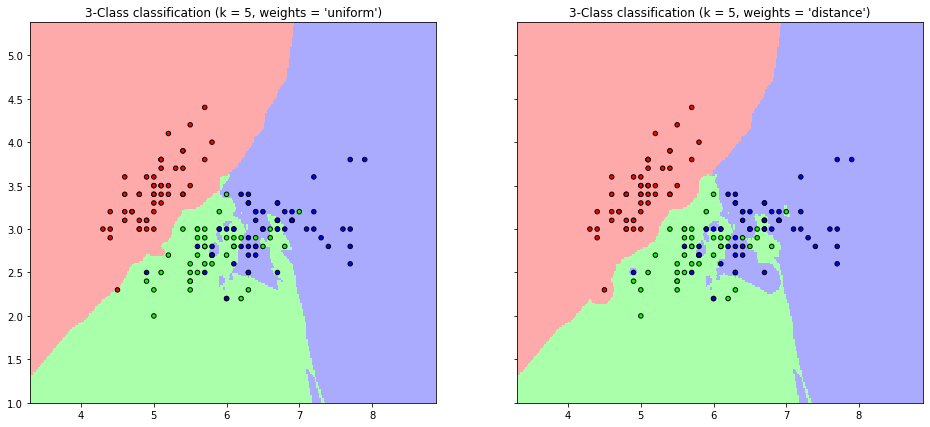

In [38]:
# import some data to play with
iris = datasets.load_iris()


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

do_kNN(X, y, k)

### Simple blobs

* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

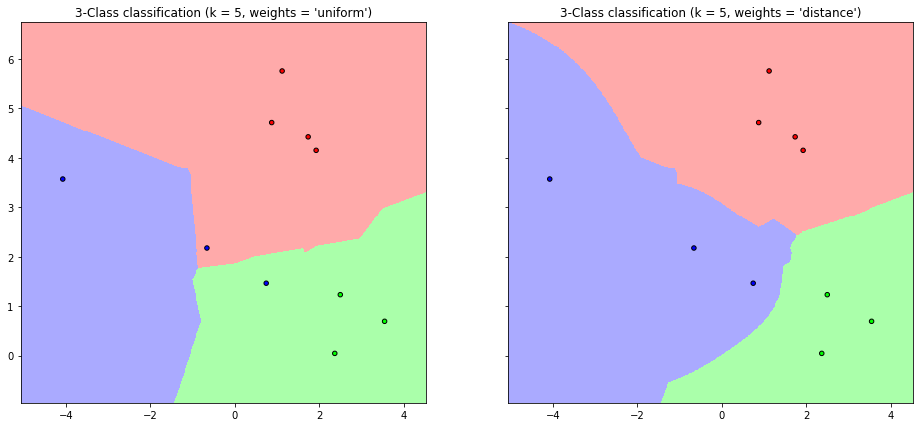

(array([[ 1.12031365,  5.75806083],
        [ 1.7373078 ,  4.42546234],
        [ 2.36833522,  0.04356792],
        [ 0.87305123,  4.71438583],
        [-0.66246781,  2.17571724],
        [ 0.74285061,  1.46351659],
        [-4.07989383,  3.57150086],
        [ 3.54934659,  0.6925054 ],
        [ 2.49913075,  1.23133799],
        [ 1.9263585 ,  4.15243012]]), array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0]))

In [39]:
# Let's do it with simple blobs!
X, y = datasets.samples_generator.make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)
# Call our function
do_kNN(X, y, k)
# Print the blob data
X, y

 * https://glowingpython.blogspot.com/2017/04/solving-two-spirals-problem-with-keras.html

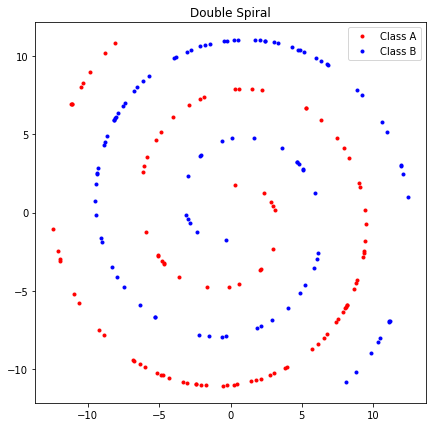

In [70]:
def twospirals(n_points, noise=0):
    "Returns the two spirals dataset"
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(100, noise = 0.0)

plt.figure(figsize=(7,7))
plt.title('Double Spiral')
# Plot with blue dots 'b.'
plt.plot(X[y==0,0], X[y==0,1], 'r.', label='Class A')
# Plot with red dots 'r.'
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Class B')
plt.legend()
plt.figure.figsize=(16, 16)
plt.show()
#X, y

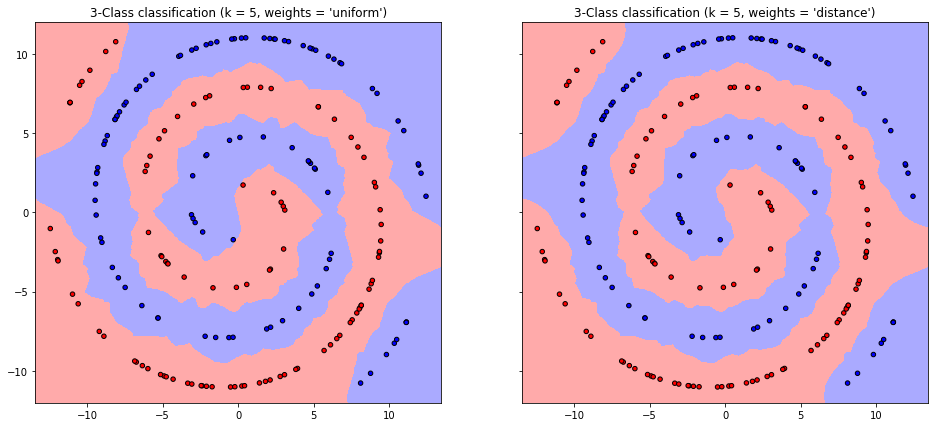

In [71]:
do_kNN(X, y, k)

## Other classic distances: SciPy

- Library: scipy.spatial.distance
- https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [4]:
from scipy.spatial import distance